# Titanic data challenge

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on. 

First, login to [Kaggle competition](https://www.kaggle.com/c/titanic) to download train.csv and test.csv. Save them to the titanic directory.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# %cd /content/drive/MyDrive/Colab Notebooks/MF815/Titanic

In [4]:
titanic = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Performing Data Cleaning and Analysis

1. Understanding meaning of each column:
Data Dictionary: 
Variable Description

Survived - Survived (1) or died (0)
Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name - Passenger’s name
Sex - Passenger’s sex
Age - Passenger’s age
SibSp - Number of siblings/spouses aboard
Parch - Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
Ticket - Ticket number
Fare - Fare
Cabin - Cabin
Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

2. Analysing which columns are completely useless in predicting the survival and deleting them
Note - Don't just delete the columns because you are not finding it useful. Or focus is not on deleting the columns. Our focus is on analysing how each column is affecting the result or the prediction and in accordance with that deciding whether to keep the column or to delete the column or fill the null values of the column by some values and if yes, then what values.

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Name column can never decide survival of a person, hence we can safely delete it
del titanic["Name"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
del titanic["Ticket"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
del titanic["Fare"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [9]:
del titanic['Cabin']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [10]:
# Changing Value for "Male, Female" string values to numeric values , male=1 and female=2
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
titanic["Gender"]=titanic["Sex"].apply(getNumber)
#We have created a new column called "Gender" and 
#filling it with values 1,2 based on the values of sex column
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [11]:
#Deleting Sex column, since no use of it now
del titanic["Sex"]
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

### Fill the null values of the Age column. Fill mean Survived age(mean age of the survived people) in the column where the person has survived and mean not Survived age (mean age of the people who have not survived) in the column where person has not survived###


In [13]:
meanS= titanic[titanic.Survived==1].Age.mean()
meanS

28.343689655172415

### Creating a new "Age" column , filling values in it with a condition if goes True then given values (here meanS) is put in place of last values else nothing happens, simply the values are copied from the "Age" column of the dataset###

In [14]:
titanic["age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,meanS, titanic["Age"])
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age            125
dtype: int64

In [16]:
# Finding the mean age of "Not Survived" people
meanNS=titanic[titanic.Survived==0].Age.mean()
meanNS

30.62617924528302

In [17]:
titanic.age.fillna(meanNS,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

In [19]:
del titanic['Age']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


### We want to check if "Embarked" column is is important for analysis or not, that is whether survival of the person depends on the Embarked column value or not###


In [20]:
# Finding the number of people who have survived 
# given that they have embarked or boarded from a particular port

survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_78816/3300902897.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_78816/3300902897.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_78816/3300902897.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]


In [21]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

47
75
427


/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_78816/3240960939.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_78816/3240960939.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_78816/3240960939.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]


As there are significant changes in the survival rate based on which port the passengers aboard the ship. 
We cannot delete the whole embarked column(It is useful). 
Now the Embarked column has some null values in it and hence we can safely say that deleting some rows from total rows will not affect the result. So rather than trying to fill those null values with some vales. We can simply remove them.

In [22]:
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [23]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [24]:
#Renaming "age" and "gender" columns
titanic.rename(columns={'age':'Age'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [25]:
titanic.rename(columns={'Gender':'Sex'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [26]:
def getS(str):
    if str=="S":
        return 1
    else:
        return 0
titanic["S"]=titanic["Embarked"].apply(getS)
def getQ(str):
    if str=="Q":
        return 1
    else:
        return 0
titanic["Q"]=titanic["Embarked"].apply(getQ)
def getC(str):
    if str=="C":
        return 1
    else:
        return 0
titanic["C"]=titanic["Embarked"].apply(getC)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,S,Q,C
0,1,0,3,1,0,S,1,22.0,1,0,0
1,2,1,1,1,0,C,2,38.0,0,0,1
2,3,1,3,0,0,S,2,26.0,1,0,0
3,4,1,1,1,0,S,2,35.0,1,0,0
4,5,0,3,0,0,S,1,35.0,1,0,0


In [27]:
del titanic['Embarked']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,S,Q,C
0,1,0,3,1,0,1,22.0,1,0,0
1,2,1,1,1,0,2,38.0,0,0,1
2,3,1,3,0,0,2,26.0,1,0,0
3,4,1,1,1,0,2,35.0,1,0,0
4,5,0,3,0,0,1,35.0,1,0,0


577
312


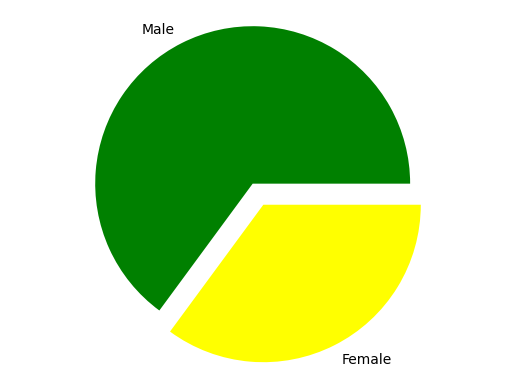

In [28]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

males = (titanic['Sex'] == 1).sum() 
#Summing up all the values of column gender with a 
#condition for male and similary for females
females = (titanic['Sex'] == 2).sum()
print(males)
print(females)
p = [males, females]
plt.pie(p,    #giving array
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['green', 'yellow'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

In [29]:
# More Precise Pie Chart
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)
MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)
FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_78816/3105620411.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_78816/3105620411.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_78816/3105620411.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
/var/folders/57/dq27lfpd1zb7kzzggckgkm2h0000gn/T/ipykernel_78816/3105620411.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]


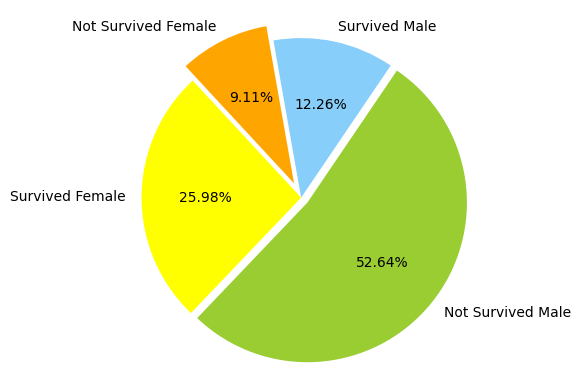

In [30]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()

In [31]:
y_train = titanic["Survived"]
del titanic['Survived']
X_train = titanic
X_train.head()

,PassengerId,Pclass,SibSp,Parch,Sex,Age,S,Q,C
0,1,3,1,0,1,22.0,1,0,0
1,2,1,1,0,2,38.0,0,0,1
2,3,3,0,0,2,26.0,1,0,0
3,4,1,1,0,2,35.0,1,0,0
4,5,3,0,0,1,35.0,1,0,0


In [32]:
# test_data = pd.read_csv("test.csv")
# test_data.head()

The data is already split into a training set and a test set. We need to preprocess the test data in the same step as we have done for the training data.

## Homework: Training classifiers

We are now ready to train classifiers. 

We first split the training data into training and validation sets. You can use cross validation as well.

Train the following three classifers:
<ul>
<li> Logistic regression </li>
<li> SVM </li>    
<li> KNN classifier </li>
</ul>

Report the features of each model, the confusion matrix, classification summary, and AUC.

Select the best model and use it to predict the test set. Submit your predictions in the test set.

### Test_Data Preprocessing



In [33]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
test_data.drop(['Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)
test_data['Gender'] = test_data['Sex'].apply(lambda x: 1 if x == 'male' else 2)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['S'] = test_data['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
test_data['Q'] = test_data['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)
test_data['C'] = test_data['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
test_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
test_data.rename(columns={'Gender': 'Sex'}, inplace=True)

In [36]:
# feature name of X_train
feature_name_train = X_train.columns.tolist()
print(feature_name_train)

print()
# feature name of test_data
feature_name_test = test_data.columns.tolist()
print(feature_name_test)


['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Age', 'S', 'Q', 'C']

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex', 'S', 'Q', 'C']


In [37]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex,S,Q,C
0,892,3,34.5,0,0,1,0,1,0
1,893,3,47.0,1,0,2,1,0,0
2,894,2,62.0,0,0,1,0,1,0
3,895,3,27.0,0,0,1,1,0,0
4,896,3,22.0,1,1,2,1,0,0


In [38]:
# match the test_data feature names with X_train
test_data = test_data[feature_name_train]
test_data.head()

,PassengerId,Pclass,SibSp,Parch,Sex,Age,S,Q,C
0,892,3,0,0,1,34.5,0,1,0
1,893,3,1,0,2,47.0,1,0,0
2,894,2,0,0,1,62.0,0,1,0
3,895,3,0,0,1,27.0,1,0,0
4,896,3,1,1,2,22.0,1,0,0


In [39]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Sex            0
Age            0
S              0
Q              0
C              0
dtype: int64

### Logistic regression

In [40]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

from ISLP import confusion_table
from ISLP.models import (ModelSpec as MS,
                         summarize)

from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 


In [41]:
# Train Test Split
sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=12345)

Feature Used

In [42]:
# show the feature names
print(sub_X_train.columns.tolist())

['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Age', 'S', 'Q', 'C']


In [43]:
scaler = StandardScaler()
lr = LogisticRegression()
log_model = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])
log_model.fit(sub_X_train, sub_y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [44]:
log_y_train_hat = log_model.predict(sub_X_train)
log_y_train_hat_probs = log_model.predict_proba(sub_X_train)[:,1]
log_train_accuracy = accuracy_score(sub_y_train, log_y_train_hat)*100
log_train_auc_roc = roc_auc_score(sub_y_train, log_y_train_hat_probs)*100
# print('Confusion matrix:\n', confusion_matrix(sub_y_train, y_train_hat))
# Calculate confusion matrix with labels
log_conf_matrix = confusion_matrix(sub_y_train, log_y_train_hat)
log_conf_matrix_df = pd.DataFrame(log_conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
print('Logistic Confusion Matrix:')
print(log_conf_matrix_df)

print('Training accuracy: %.4f %%' % log_train_accuracy)
print('Training AUC: %.4f %%' % log_train_auc_roc)

Logistic Confusion Matrix:
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                     346                  66
Actual Survived                          67                 187
Training accuracy: 80.0300 %
Training AUC: 87.0757 %


In [45]:
log_y_test_hat = log_model.predict(sub_X_test)
log_y_test_hat_probs = log_model.predict_proba(sub_X_test)[:,1]
log_test_accuracy = accuracy_score(sub_y_test, log_y_test_hat)*100
log_test_auc_roc = roc_auc_score(sub_y_test, log_y_test_hat_probs)*100

test_log_conf_matrix = confusion_matrix(sub_y_test, log_y_test_hat)
test_log_conf_matrix_df = pd.DataFrame(test_log_conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
print('Logistic Confusion Matrix:')
print(test_log_conf_matrix_df)

print('Testing accuracy: %.4f %%' % log_test_accuracy)
print('Testing AUC: %.4f %%' % log_test_auc_roc)

Logistic Confusion Matrix:
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                     118                  19
Actual Survived                          28                  58
Testing accuracy: 78.9238 %
Testing AUC: 82.8976 %


In [46]:
print(classification_report(sub_y_test, log_y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.808219  0.861314  0.833922       137
           1   0.753247  0.674419  0.711656        86

    accuracy                       0.789238       223
   macro avg   0.780733  0.767866  0.772789       223
weighted avg   0.787019  0.789238  0.786770       223



##### do the cross validation to tune hyperparameters for logistic regression

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'log_reg__penalty': ['l1', 'l2']
}

In [49]:
cv_log_model = Pipeline([('standardize', scaler), ('log_reg', lr)])

In [50]:
grid_search = GridSearchCV(cv_log_model, param_grid, cv=5)
grid_search.fit(sub_X_train, sub_y_train)

/Users/xiaozhezhang/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/xiaozhezhang/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/xiaozhezhang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/xiaozhezhang/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 427, in

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardize', StandardScaler()),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'log_reg__penalty': ['l1', 'l2']})

In [51]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best parameters:', best_params)
print('Best model:', best_model)

Best parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}
Best model: Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression(C=0.01))])


In [52]:
best_model.fit(sub_X_train, sub_y_train)


Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression(C=0.01))])

In [53]:
best_log_y_train_hat = best_model.predict(sub_X_train)
best_log_y_train_hat_probs = best_model.predict_proba(sub_X_train)[:,1]
best_log_train_accuracy = accuracy_score(sub_y_train, best_log_y_train_hat)*100
best_log_train_auc_roc = roc_auc_score(sub_y_train, best_log_y_train_hat_probs)*100
# print('Confusion matrix:\n', confusion_matrix(sub_y_train, y_train_hat))
# Calculate confusion matrix with labels
best_log_conf_matrix = confusion_matrix(sub_y_train, best_log_y_train_hat)
best_log_conf_matrix_df = pd.DataFrame(best_log_conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
print('Logistic Confusion Matrix:')
print(best_log_conf_matrix_df)

print('Training accuracy: %.4f %%' % best_log_train_accuracy)
print('Training AUC: %.4f %%' % best_log_train_auc_roc)


Logistic Confusion Matrix:
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                     382                  30
Actual Survived                          89                 165
Training accuracy: 82.1321 %
Training AUC: 86.5664 %


In [54]:
best_log_y_test_hat = best_model.predict(sub_X_test)
best_log_y_test_hat_probs = best_model.predict_proba(sub_X_test)[:,1]
best_log_test_accuracy = accuracy_score(sub_y_test, best_log_y_test_hat)*100
best_log_test_auc_roc = roc_auc_score(sub_y_test, best_log_y_test_hat_probs)*100

test_best_log_conf_matrix = confusion_matrix(sub_y_test, best_log_y_test_hat)
test_best_log_conf_matrix_df = pd.DataFrame(test_best_log_conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
print('Logistic Confusion Matrix:')
print(test_best_log_conf_matrix_df)

print('Testing accuracy: %.4f %%' % best_log_test_accuracy)
print('Testing AUC: %.4f %%' % best_log_test_auc_roc)


Logistic Confusion Matrix:
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                     128                   9
Actual Survived                          39                  47
Testing accuracy: 78.4753 %
Testing AUC: 83.0250 %


In [55]:
print(classification_report(sub_y_test, best_log_y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.766467  0.934307  0.842105       137
           1   0.839286  0.546512  0.661972        86

    accuracy                       0.784753       223
   macro avg   0.802876  0.740409  0.752039       223
weighted avg   0.794550  0.784753  0.772637       223



### SVM

In [56]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


Feature Used

In [57]:
# show the feature names
print(sub_X_train.columns.tolist())

['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Age', 'S', 'Q', 'C']


In [58]:
# SVM classifier model
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_model.fit(sub_X_train, sub_y_train)

svm_y_train_hat = svm_model.predict(sub_X_train)
svm_y_train_hat_probs = svm_model.decision_function(sub_X_train)
svm_train_accuracy = accuracy_score(sub_y_train, svm_y_train_hat)*100
svm_train_auc_roc = roc_auc_score(sub_y_train, svm_y_train_hat_probs)*100
svm_conf_matrix = confusion_matrix(sub_y_train, svm_y_train_hat)
svm_conf_matrix_df = pd.DataFrame(svm_conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
print('SVM Confusion Matrix:')
print(svm_conf_matrix_df)

print('Training accuracy: %.4f %%' % svm_train_accuracy)
print('Training AUC: %.4f %%' % svm_train_auc_roc)

print()
svm_y_test_hat = svm_model.predict(sub_X_test)
svm_y_test_hat_probs = svm_model.decision_function(sub_X_test)
svm_test_accuracy = accuracy_score(sub_y_test, svm_y_test_hat)*100
svm_test_auc_roc = roc_auc_score(sub_y_test, svm_y_test_hat_probs)*100
test_svm_conf_matrix = confusion_matrix(sub_y_test, svm_y_test_hat)
test_svm_conf_matrix_df = pd.DataFrame(test_svm_conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
print('SVM Confusion Matrix:')
print(test_svm_conf_matrix_df)

print('Testing accuracy: %.4f %%' % svm_test_accuracy)
print('Testing AUC: %.4f %%' % svm_test_auc_roc)
print()
print(classification_report(sub_y_test, svm_y_test_hat, digits=6))


SVM Confusion Matrix:
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                     364                  48
Actual Survived                          82                 172
Training accuracy: 80.4805 %
Training AUC: 86.2300 %

SVM Confusion Matrix:
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                     124                  13
Actual Survived                          32                  54
Testing accuracy: 79.8206 %
Testing AUC: 82.8552 %

              precision    recall  f1-score   support

           0   0.794872  0.905109  0.846416       137
           1   0.805970  0.627907  0.705882        86

    accuracy                       0.798206       223
   macro avg   0.800421  0.766508  0.776149       223
weighted avg   0.799152  0.798206  0.792219       223



In [59]:
# Cross-validation for SVM model
param_grid = {
    'svc__C': [0.001, 0.01, 0.1],  # Example values for the regularization parameter C
    'svc__penalty': ['l1', 'l2']  # Example penalty options
}

scaler = StandardScaler()
svc = LinearSVC(dual=False, max_iter=10000)
svm_model_cv = Pipeline([('standardize', scaler), ('svc', svc)])

grid_search = GridSearchCV(svm_model_cv, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(sub_X_train, sub_y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print('Best parameters:', best_params)
print('Best model:', best_model)

# Evaluate the best model on training data
best_y_train_hat = best_model.predict(sub_X_train)
best_y_train_hat_probs = best_model.decision_function(sub_X_train)
best_train_accuracy = accuracy_score(sub_y_train, best_y_train_hat) * 100
best_train_auc_roc = roc_auc_score(sub_y_train, best_y_train_hat_probs) * 100
best_conf_matrix = confusion_matrix(sub_y_train, best_y_train_hat)
best_conf_matrix_df = pd.DataFrame(best_conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
print('Best SVM Confusion Matrix (Training):')
print(best_conf_matrix_df)
print('Training accuracy: %.4f %%' % best_train_accuracy)
print('Training AUC: %.4f %%' % best_train_auc_roc)

# Evaluate the best model on testing data
best_y_test_hat = best_model.predict(sub_X_test)
best_y_test_hat_probs = best_model.decision_function(sub_X_test)
best_test_accuracy = accuracy_score(sub_y_test, best_y_test_hat) * 100
best_test_auc_roc = roc_auc_score(sub_y_test, best_y_test_hat_probs) * 100
test_best_conf_matrix = confusion_matrix(sub_y_test, best_y_test_hat)
test_best_conf_matrix_df = pd.DataFrame(test_best_conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
print('Best SVM Confusion Matrix (Testing):')
print(test_best_conf_matrix_df)
print('Testing accuracy: %.4f %%' % best_test_accuracy)
print('Testing AUC: %.4f %%' % best_test_auc_roc)

# Print classification report for testing data
print(classification_report(sub_y_test, best_y_test_hat, digits=6))

Best parameters: {'svc__C': 0.1, 'svc__penalty': 'l1'}
Best model: Pipeline(steps=[('standardize', StandardScaler()),
                ('svc',
                 LinearSVC(C=0.1, dual=False, max_iter=10000, penalty='l1'))])
Best SVM Confusion Matrix (Training):
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                     352                  60
Actual Survived                          67                 187
Training accuracy: 80.9309 %
Training AUC: 86.8617 %
Best SVM Confusion Matrix (Testing):
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                     117                  20
Actual Survived                          27                  59
Testing accuracy: 78.9238 %
Testing AUC: 82.7236 %
              precision    recall  f1-score   support

           0   0.812500  0.854015  0.832740       137
           1   0.746835  0.686047  0.715152        86

    accuracy                       0.789238       22

not better than the vanila linear svm, just use svm_model

### KNN

Feature Used

In [60]:
# show the feature names
print(sub_X_train.columns.tolist())

['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Age', 'S', 'Q', 'C']


In [61]:
# KNN
KNN_X_train, KNN_test_data = [np.asarray(X) for X in [sub_X_train, sub_X_test]]
missclassifications = []
K_value = pd.Series(range(1, 20))

for k in K_value:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(KNN_X_train, sub_y_train)
    KNN_pred = KNN.predict(KNN_test_data)
    missclassifications.append(np.mean(KNN_pred != sub_y_test))

inverse_k_value = [1/k for k in K_value]

In [62]:
# create the missclassification table with corresponding K value
missclassification_table = pd.DataFrame({'K': K_value, 'Missclassification': missclassifications, 'Inverse K': inverse_k_value})
missclassification_table

,K,Missclassification,Inverse K
0,1,0.434978,1.000000
1,2,0.452915,0.500000
2,3,0.484305,0.333333
3,4,0.439462,0.250000
4,5,0.461883,0.200000
5,6,0.412556,0.166667
6,7,0.452915,0.142857
7,8,0.412556,0.125000
8,9,0.439462,0.111111
9,10,0.399103,0.100000


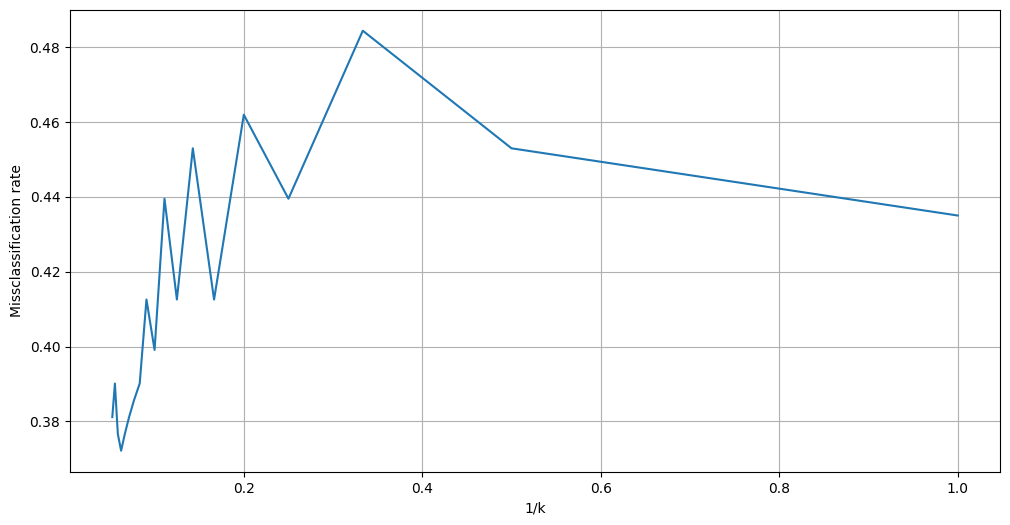

In [63]:
# Create the plot
# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(inverse_k_value, missclassifications)
ax.set_xlabel('1/k')
ax.set_ylabel('Missclassification rate')

plt.grid(True)
# Display the plot
plt.show()

In [64]:
# Find the k with the lowest misclassification rate among k values less than or equal to 10
k_values_under_10 = pd.Series(range(1, 11))  # Consider k values from 1 to 10
min_missclassification_under_10 = min(missclassifications[:10])  # Find the lowest error rate among the first 10 k values
best_k_under_10 = missclassifications.index(min_missclassification_under_10) + 1

print(f"The lowest misclassification rate under 10 folds is {min_missclassification_under_10}, achieved at k={best_k_under_10}")

The lowest misclassification rate under 10 folds is 0.3991031390134529, achieved at k=10


In [65]:
knn_model = KNeighborsClassifier(n_neighbors=best_k_under_10)
knn_model.fit(sub_X_train, sub_y_train)

knn_y_train_hat = knn_model.predict(sub_X_train)
knn_train_accuracy = accuracy_score(sub_y_train, knn_y_train_hat)*100
knn_train_conf_matrix = confusion_matrix(sub_y_train, knn_y_train_hat)
knn_train_conf_matrix_df = pd.DataFrame(knn_train_conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
print('KNN Confusion Matrix:')
print(knn_train_conf_matrix_df)

print('Training accuracy: %.4f %%' % knn_train_accuracy)

KNN Confusion Matrix:
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                     385                  27
Actual Survived                         214                  40
Training accuracy: 63.8138 %


In [66]:
knn_y_test_hat = knn_model.predict(sub_X_test)
knn_y_test_hat_probs = knn_model.predict_proba(sub_X_test)[:,1]
knn_test_accuracy = accuracy_score(sub_y_test, knn_y_test_hat)*100
knn_test_conf_matrix = confusion_matrix(sub_y_test, knn_y_test_hat)
knn_test_conf_matrix_df = pd.DataFrame(knn_test_conf_matrix, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
print('KNN Confusion Matrix:')
print(knn_test_conf_matrix_df)

print('Testing accuracy: %.4f %%' % knn_test_accuracy)


KNN Confusion Matrix:
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                     121                  16
Actual Survived                          73                  13
Testing accuracy: 60.0897 %


In [67]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr_best_logreg, tpr_best_logreg, thresholds = roc_curve(sub_y_test, best_log_y_test_hat_probs)
auc_best_logreg = auc(fpr_best_logreg, tpr_best_logreg)

fpr_svm, tpr_svm, thresholds = roc_curve(sub_y_test, svm_y_test_hat_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, thresholds = roc_curve(sub_y_test, knn_y_test_hat)
auc_knn = auc(fpr_knn, tpr_knn)

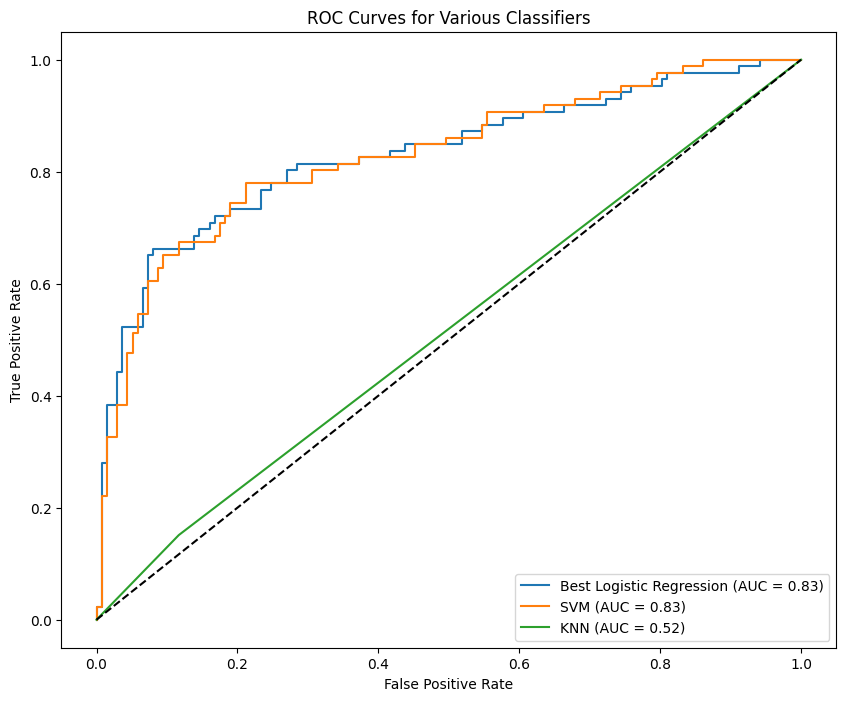

In [68]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_best_logreg, tpr_best_logreg, label=f'Best Logistic Regression (AUC = {auc_best_logreg:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')

plt.plot([0, 1], [0, 1], 'k--') # Diagonal dashed line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Classifiers')
plt.legend(loc='lower right')
plt.show()


### Predict the test csv with the best model
SVM is has the highest Testing Accuracy and Testing AUC

In [69]:
# predict using the best SVM model
ultimate_svm_y_test_hat = svm_model.predict(test_data)


In [70]:
# add the predicted values to the test_data
test_data['Survived'] = ultimate_svm_y_test_hat
test_data.head()

,PassengerId,Pclass,SibSp,Parch,Sex,Age,S,Q,C,Survived
0,892,3,0,0,1,34.5,0,1,0,0
1,893,3,1,0,2,47.0,1,0,0,0
2,894,2,0,0,1,62.0,0,1,0,0
3,895,3,0,0,1,27.0,1,0,0,0
4,896,3,1,1,2,22.0,1,0,0,1


In [71]:
test_data.to_csv('predicted_result.csv', index=False)

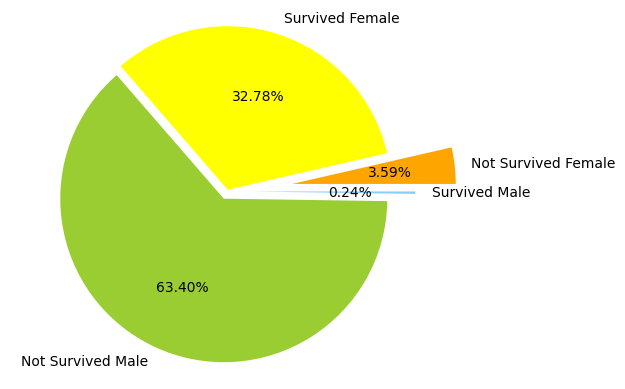

In [72]:
# Calculate the counts for survived and not survived males and females in the test data
test_MaleS = test_data[(test_data['Sex'] == 1) & (test_data['Survived'] == 1)].shape[0]
test_MaleN = test_data[(test_data['Sex'] == 1) & (test_data['Survived'] == 0)].shape[0]
test_FemaleS = test_data[(test_data['Sex'] == 2) & (test_data['Survived'] == 1)].shape[0]
test_FemaleN = test_data[(test_data['Sex'] == 2) & (test_data['Survived'] == 0)].shape[0]

# Define the chart data and styling
test_chart = [test_MaleS, test_MaleN, test_FemaleS, test_FemaleN]
test_colors = ['lightskyblue', 'yellowgreen', 'yellow', 'orange']
test_labels = ["Survived Male", "Not Survived Male", "Survived Female", "Not Survived Female"]
test_explode = [0.15, 0.05, 0.01, 0.4]


# Adjust the startangle until the "Survived Male" appears on the right side
adjusted_startangle = 0  # Start with 0 and adjust as needed

# Create and display the pie chart with the adjusted startangle
plt.pie(test_chart, labels=test_labels, colors=test_colors, explode=test_explode, startangle=adjusted_startangle, counterclock=False, autopct="%.2f%%")
plt.axis("equal")
plt.show()

